In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from keras import layers
from keras.models import Sequential

In [4]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228813984/228813984 [==============================] - 41s 0us/step


In [5]:
data_dir

'.\\datasets\\flower_photos'

In [6]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [7]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [8]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [9]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

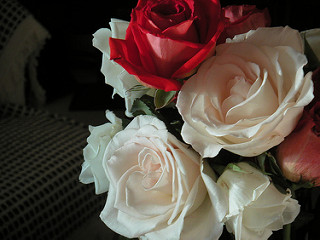

In [10]:
PIL.Image.open(str(roses[1]))

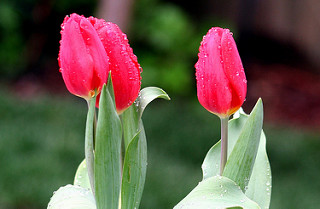

In [11]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [12]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [13]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [25]:
flowers_images_dict['roses'][:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

In [15]:
str(flowers_images_dict['roses'][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [16]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [17]:
img.shape

(240, 179, 3)

In [18]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [19]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [20]:
X = np.array(X)
y = np.array(y)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [22]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [26]:
X_train_scaled.shape

(2752, 180, 180, 3)

In [23]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=15)              




Epoch 1/30


 9/86 [==>...........................] - ETA: 13s - loss: 1.6960 - accuracy: 0.2361

KeyboardInterrupt: 

In [364]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 0s 5ms/step - loss: 2.4165 - accuracy: 0.6699


[2.4165186882019043, 0.6699346303939819]

In [365]:
predictions = model.predict(X_test_scaled)
predictions

array([[  5.5538044 ,  28.357603  ,  -2.64333   , -17.732698  ,
         -8.868293  ],
       [  7.971043  ,   7.614807  , -11.15702   ,  -9.508243  ,
          2.866003  ],
       [  0.12697598,   3.7088952 ,  13.012845  , -17.065691  ,
         -1.0256854 ],
       ...,
       [ -1.2454829 ,  -6.018974  ,  -9.245011  ,   6.1912336 ,
          3.9217234 ],
       [ -0.2303026 ,  -0.22910628,  -7.751635  ,   6.4317822 ,
          4.1837516 ],
       [  0.5132807 , -20.254309  ,  -1.2567687 ,   7.799835  ,
          3.5779328 ]], dtype=float32)

In [366]:
score = tf.nn.softmax(predictions[0])

In [367]:
np.argmax(score)

1

In [368]:
y_test[0]

1

In [369]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

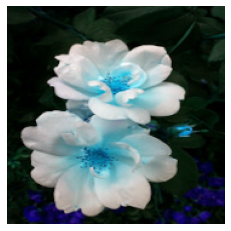

In [370]:
plt.axis('off')
plt.imshow(X[0])

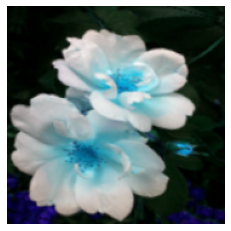

In [371]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [372]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=15)    

Epoch 1/30
86/86 [==============================] - 1s 17ms/step - loss: 1.4347 - accuracy: 0.3844
Epoch 2/30
86/86 [==============================] - 1s 16ms/step - loss: 1.0742 - accuracy: 0.5789
Epoch 3/30
86/86 [==============================] - 1s 15ms/step - loss: 0.9900 - accuracy: 0.6130
Epoch 4/30
86/86 [==============================] - 1s 13ms/step - loss: 0.9247 - accuracy: 0.6421
Epoch 5/30
86/86 [==============================] - 1s 14ms/step - loss: 0.8485 - accuracy: 0.6722
Epoch 6/30
86/86 [==============================] - 1s 16ms/step - loss: 0.8226 - accuracy: 0.6893
Epoch 7/30
86/86 [==============================] - 1s 14ms/step - loss: 0.7964 - accuracy: 0.6944
Epoch 8/30
86/86 [==============================] - 1s 15ms/step - loss: 0.7662 - accuracy: 0.7140
Epoch 9/30
86/86 [==============================] - 1s 16ms/step - loss: 0.7292 - accuracy: 0.7249
Epoch 10/30
86/86 [==============================] - 2s 18ms/step - loss: 0.6941 - accuracy: 0.7362
Epoch 11/

In [373]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 0s 5ms/step - loss: 0.8419 - accuracy: 0.7375


[0.8418797850608826, 0.7374727725982666]